In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [6]:
columns=['HomePlanet','CryoSleep','VIP','Destination']
for col in columns:
    train[col].fillna(train[col].mode(), inplace=True)
    test[col].fillna(train[col].mode(), inplace=True)

In [7]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)

In [8]:
a=['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']
for i in a:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(train[i].mean(), inplace=True)

In [9]:
train=pd.get_dummies(train, columns=['HomePlanet'],dtype='int64')
test=pd.get_dummies(test, columns=['HomePlanet'],dtype='int64')
train=pd.get_dummies(train, columns=['Destination'],dtype='int64')
test=pd.get_dummies(test, columns=['Destination'],dtype='int64')

In [10]:
b=['CryoSleep','VIP']
le=LabelEncoder()
for i in b:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])
train['Transported']=le.fit_transform(train['Transported'])

In [11]:
train['CryoSleep']=train['CryoSleep'].astype('int64')
test['CryoSleep']=test['CryoSleep'].astype('int64')

In [12]:
train[['cabin_code', 'cabin_number', 'cabin_location']] = train['Cabin'].str.split('/', expand=True)
test[['cabin_code', 'cabin_number', 'cabin_location']] = test['Cabin'].str.split('/', expand=True)

In [13]:
train['cabin_code'].fillna('U', inplace=True)
train['cabin_number'] = train['cabin_number'].astype(float)
test['cabin_code'].fillna('U', inplace=True)
test['cabin_number'] = test['cabin_number'].astype(float)
train['cabin_number'].fillna(train['cabin_number'].median(), inplace=True)
test['cabin_number'].fillna(test['cabin_number'].median(), inplace=True)

In [14]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
train.drop('cabin_location', axis=1, inplace=True)
test.drop('cabin_location', axis=1, inplace=True)

In [15]:
train['cabin_code']=le.fit_transform(train['cabin_code'])
test['cabin_code']=le.fit_transform(test['cabin_code'])

In [16]:
col = ['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']
scaler=StandardScaler()
train['Age']=scaler.fit_transform(train['Age'].values.reshape(-1,1))
test['Age']=scaler.fit_transform(test['Age'].values.reshape(-1,1))
for i in col:
    train[i]=scaler.fit_transform(train[i].values.reshape(-1,1))
    test[i]=scaler.fit_transform(test[i].values.reshape(-1,1))

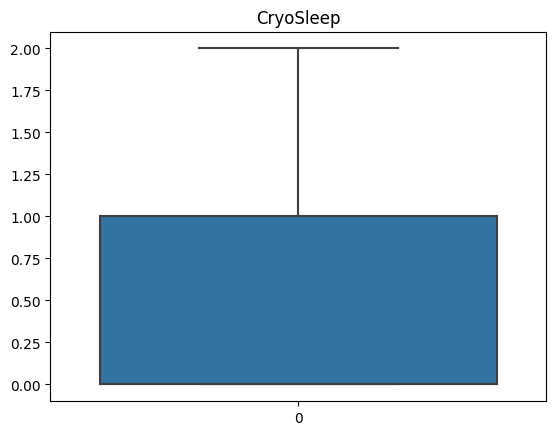

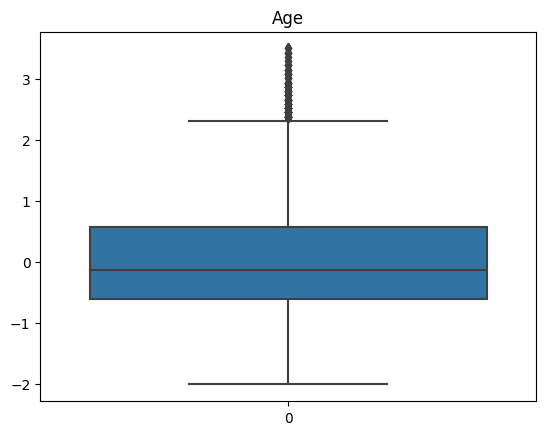

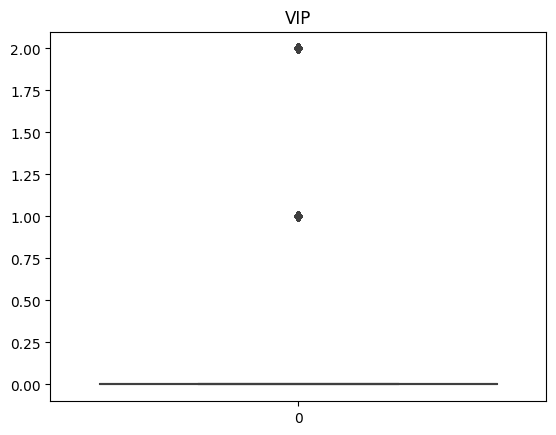

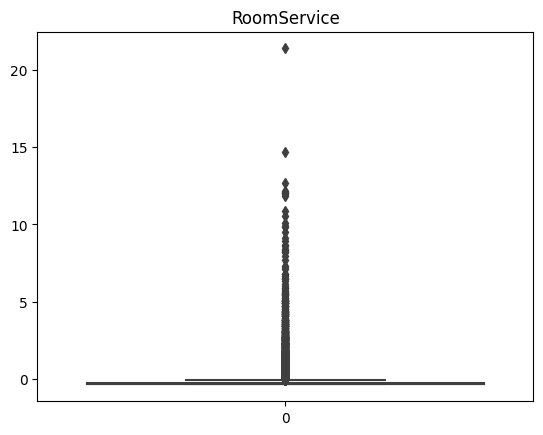

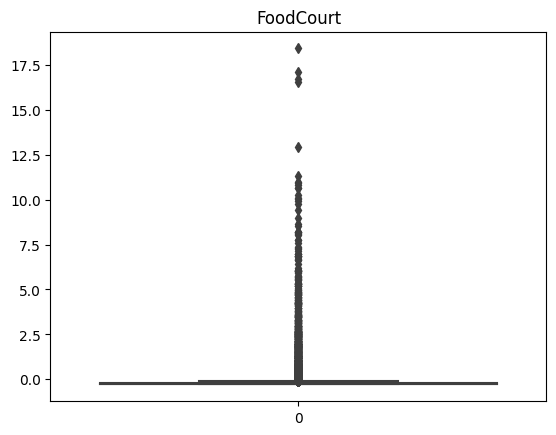

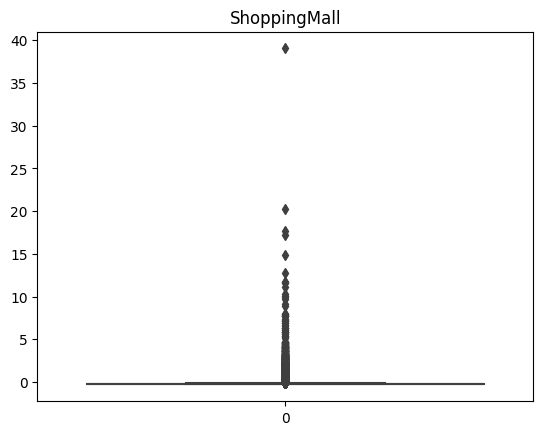

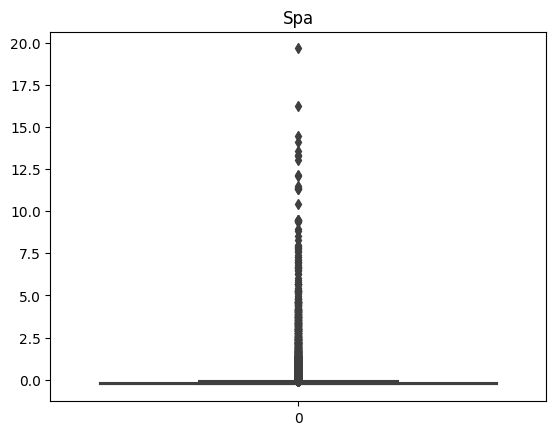

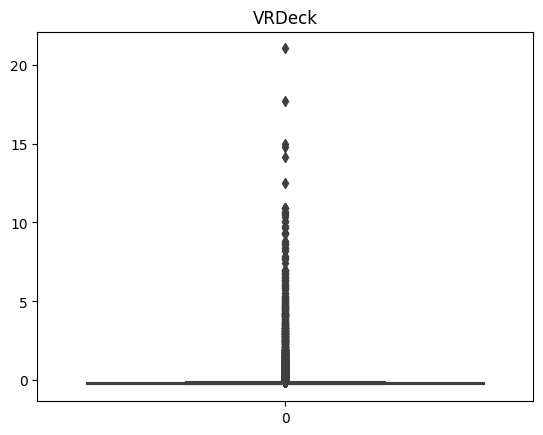

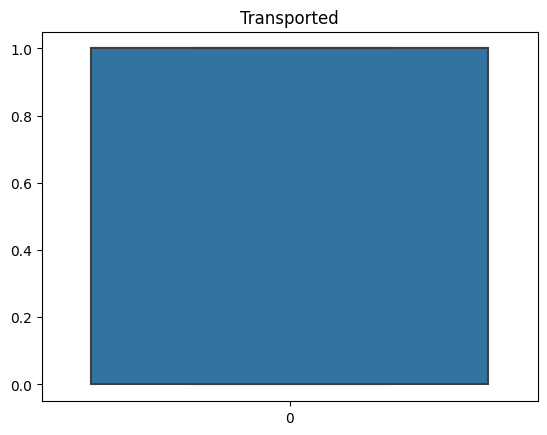

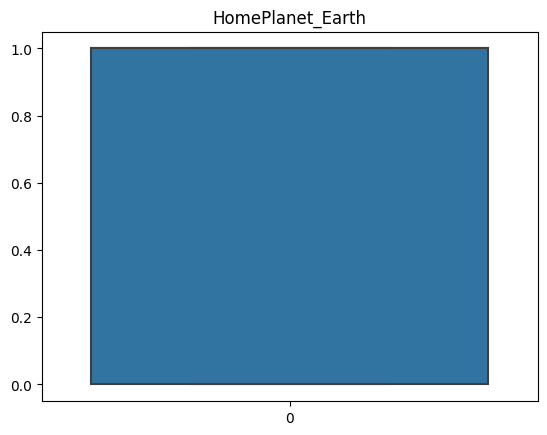

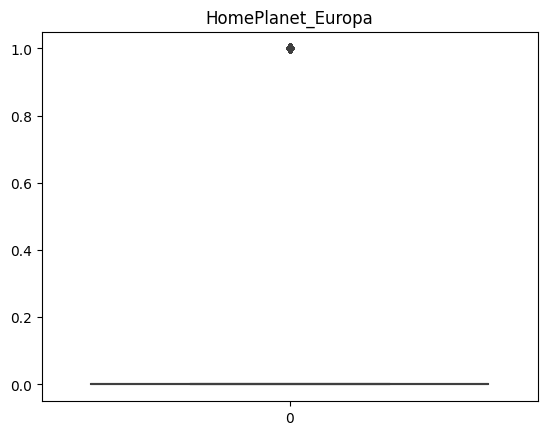

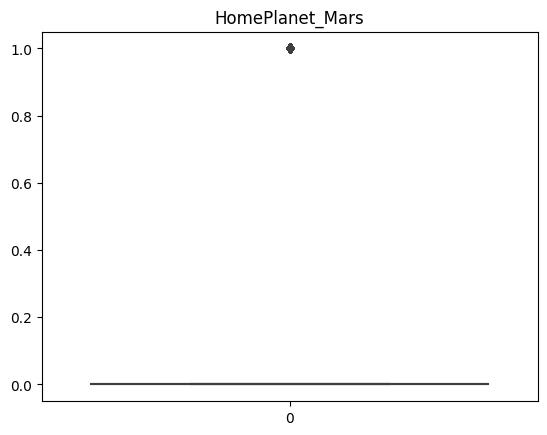

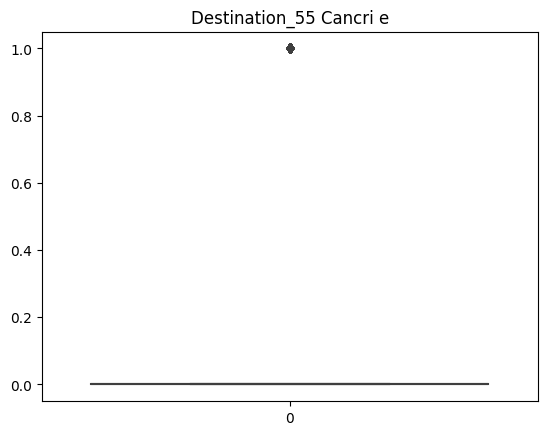

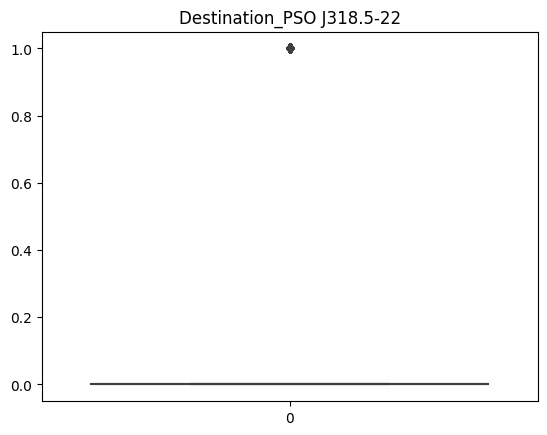

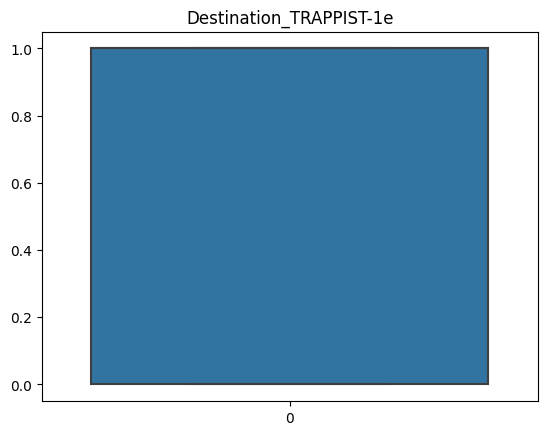

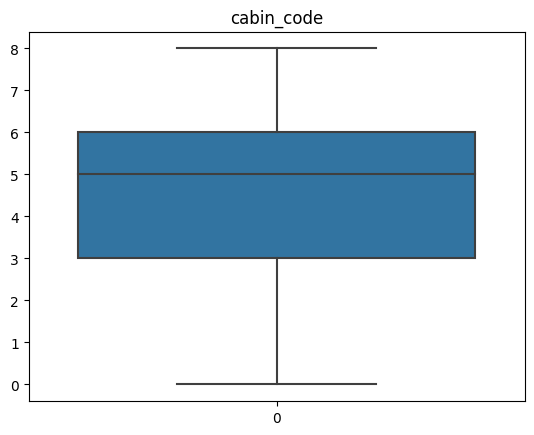

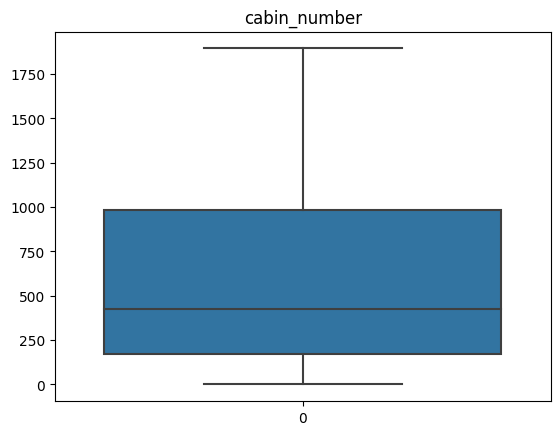

In [17]:
for col in train.columns:
  sns.boxplot(train[col])
  plt.title(col)
  plt.show()
